In [2]:
from IPython.display import clear_output

In [3]:
# Install the necessary packages
%pip install numpy matplotlib scikit-learn

clear_output()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Basic Liner Regression

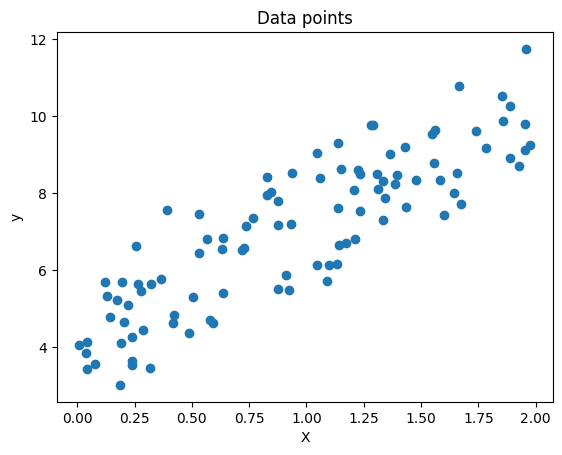

In [5]:
# Generate some data points along a line with some noise
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data points
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data points")
plt.show()


Intercept: [4.32235853]
Coefficient: [2.93647151]
Mean Squared Error: 1.0434333815695171


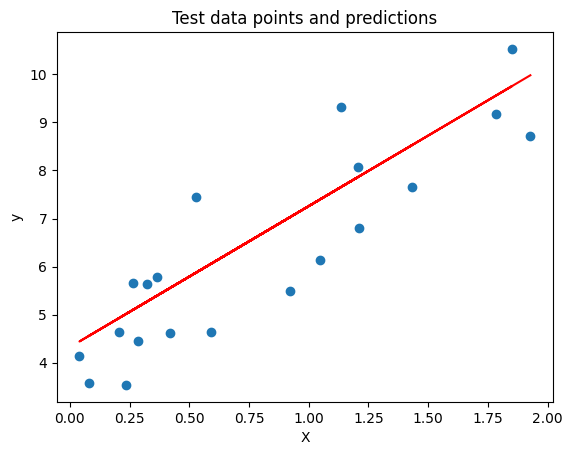

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print the model's coefficients
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_[0]}")

# Evaluate the model
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the test data points and the predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test data points and predictions")
plt.show()

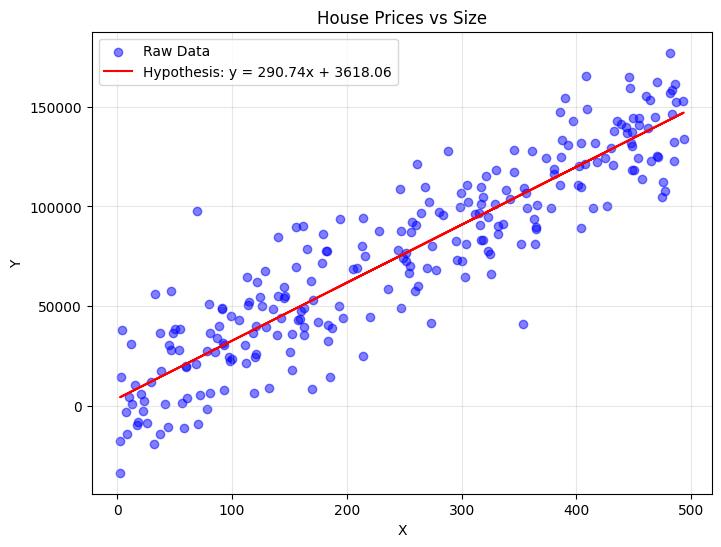

Metrics for House Prices vs Size:
Mean Squared Error (MSE): 392377931.96
Mean Absolute Error (MAE): 15843.01
R-squared (R2): 0.83




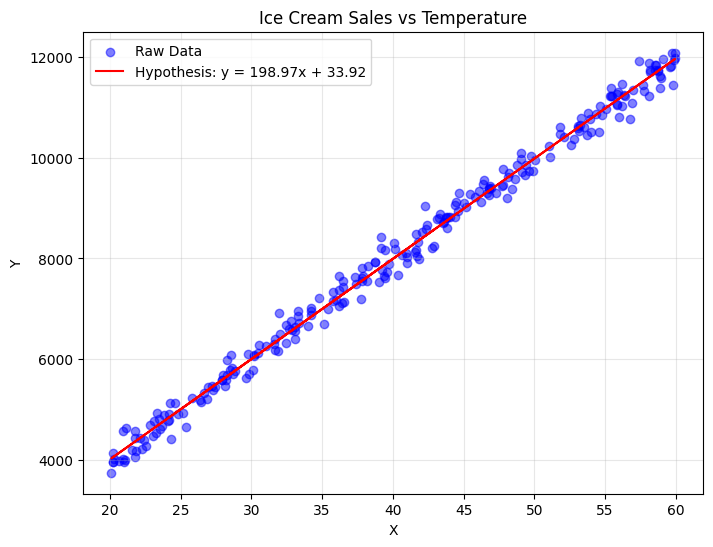

Metrics for Ice Cream Sales vs Temperature:
Mean Squared Error (MSE): 39176.12
Mean Absolute Error (MAE): 156.10
R-squared (R2): 0.99




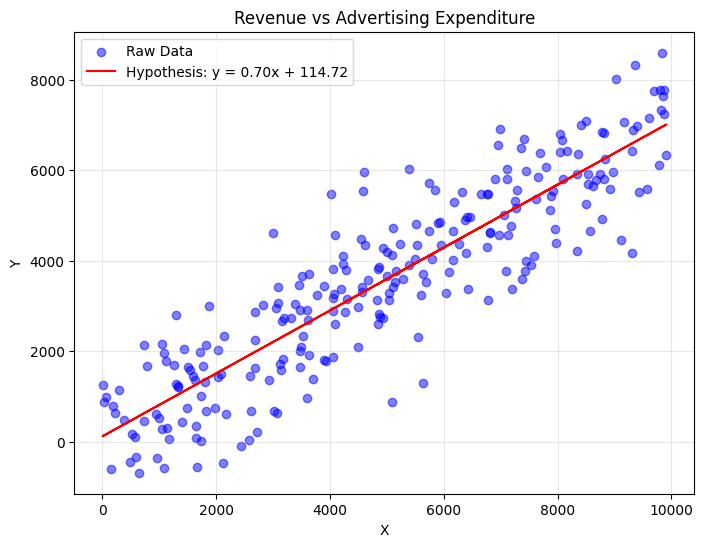

Metrics for Revenue vs Advertising Expenditure:
Mean Squared Error (MSE): 938119.04
Mean Absolute Error (MAE): 777.43
R-squared (R2): 0.80




In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for 3 examples

# Example 1: House prices vs size
np.random.seed(42)
size = np.random.rand(250) * 500  # Size of houses in sqft
price = size * 300 + np.random.randn(250) * 20000  # Price in dollars with noise

# Example 2: Temperature vs ice cream sales
np.random.seed(43)
temperature = np.random.rand(250) * 40 + 20  # Temperature in degrees Celsius
ice_cream_sales = temperature * 200 + np.random.randn(250) * 200  # Sales in dollars

# Example 3: Advertising expenditure vs revenue
np.random.seed(44)
ad_expenditure = np.random.rand(250) * 10000  # Advertising budget in dollars
revenue = ad_expenditure * 0.7 + np.random.randn(250) * 1000  # Revenue in dollars

# Linear regression function using NumPy
def simple_linear_regression(x, y):
    # Add a bias term to X for the intercept
    X = np.vstack((x, np.ones(len(x)))).T
    # Solve for weights w = [slope, intercept] using the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

# Perform linear regression on each dataset
datasets = [
    (size, price, "House Prices vs Size"),
    (temperature, ice_cream_sales, "Ice Cream Sales vs Temperature"),
    (ad_expenditure, revenue, "Revenue vs Advertising Expenditure")
]

# Iterate over datasets
for x, y, title in datasets:
    # Train model
    slope, intercept = simple_linear_regression(x, y)

    # Predict using hypothesis
    y_pred = slope * x + intercept

    # Calculate metrics manually (NumPy)
    mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
    ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    r2 = 1 - (ss_residual / ss_total)  # R-squared

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5, label="Raw Data")
    plt.plot(x, y_pred, color='red', label=f"Hypothesis: y = {slope:.2f}x + {intercept:.2f}")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Display error metrics
    print(f"Metrics for {title}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\n")
